In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import matplotlib
from matplotlib.backends.backend_pdf import PdfPages
from scipy import fftpack

In [111]:
path= '/home/hcapettini/Escritorio/HDD1TB/Tesis/Analísis/Mayo/'             
#path = '/media/adminpc/Hilario-2/Tesis/Analísis/Mayo/'

simulacion='pulso_9' 
#simulacion='desequilibrio_5' 

pathr=path+simulacion+'/'+simulacion

#Tiempo a analizar
tmin_FT =0
tmax_FT =500
varstr='dens'
f_m = 0.5

In [112]:
radio= 3.e8;
largo= 25.e8;

c=2;                #ancho EN celdas por ejemplo cada 5 celdas Xcinco celdas hay un punto el ancho es 5
dc=0.1e8;           #Este es el ancho de cada celda de acuerdo al refinamiento
space = c * dc;
x0=space/2.;         #Indicar el punto inical el x
y0=5.e8 +space/2.; #Indicar el punto inical el y


nx=int(radio/(c*dc));
ny=int(largo/(c*dc));

In [113]:
pos='_'+str(x0/1.e8)+ '_'+str(y0/1.e8)+ '_'

with open(pathr +pos+'TF'+'_'+str(tmin_FT)+'_'+str(tmax_FT)+'_'+ varstr+'.txt') as var:
    varlines = var.readlines()[:]
    freq  = [float(line.split()[0]) for line in varlines]

nf=len(freq)
variable=np.zeros((ny, nx,nf))

In [114]:
for j in range (0,ny):  
    for i in range (0,nx):
        x=x0 +i*space
        y=y0 +j*space
        pos='_'+str(x/1.e8)+ '_'+str(y/1.e8)+ '_'
        with open(pathr +pos+'TF'+'_'+str(tmin_FT)+'_'+str(tmax_FT)+'_'+ varstr+'.txt') as var:
            varlines = var.readlines()[:]
            varx = [float(line.split()[1]) for line in varlines]
        freq = np.array(freq)
        variablen = np.array(varx)
        
        
        variable[j,i,:]=variablen

(0.0, 0.05)

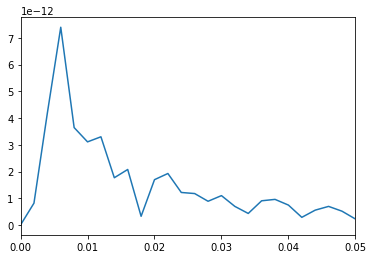

In [115]:
plt.plot(freq,variable[60,3,:])
plt.xlim(0., 0.05)


In [116]:
f0    = 0.005
f1=0.01
f2=0.075

xmin =0.e8
xmax =2.7e8
ymin =0.5e8
ymax =24.5e8


nxmin=int(xmin/space)
nxmax=int(xmax/space)
nymin=int(ymin/space)
nymax=int(ymax/space)

rango=((xmin)/1.e8,xmax/1.e8,(ymin+5.e8)/1.e8,(ymax+5.e8)/1.e8)


df    = 1/nf

n0=int(f0/df)
d0=variable[nymin:nymax,nxmin:nxmax,n0]

n1=int(f1/df)
d1=variable[nymin:nymax,nxmin:nxmax,n1]
d1min=np.amin(d1)
d1max=np.amax(d1)

n2=int(f2/df)
d2=variable[nymin:nymax,nxmin:nxmax,n2]
d2min=np.amin(d2)
d2max=np.amax(d2)


colorbarmin =min(d1min,d2min)
colorbarmax =max(d1max,d2max)

In [117]:
#print(d1min,d1max)

In [118]:
#print(d2min,d2max)

In [119]:
#print(colorbarmin,colorbarmax)

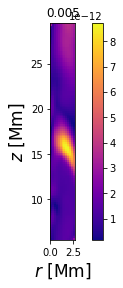

In [120]:
plt.imshow(d0,cmap='plasma', extent=rango,origin='lower')
plt.title(str(f0))
plt.ylabel(r'${z}$ [Mm]',fontsize=17)  
plt.xlabel(r'${r}$ [Mm]',fontsize=17)
plt.colorbar()
#plt.clim(1.e-16,5.e-14)

plt.show()



#plt.savefig(pathr+'_mapa_fourier_'+str(f)+'.pdf', bbox_inches='tight')   
plt.show()

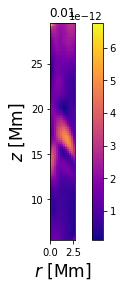

In [121]:
plt.imshow(d1,cmap='plasma', extent=rango,origin='lower')
plt.title(str(f1))
plt.ylabel(r'${z}$ [Mm]',fontsize=17)  
plt.xlabel(r'${r}$ [Mm]',fontsize=17)
plt.colorbar()
plt.show()



#plt.savefig(pathr+'_mapa_fourier_'+str(f)+'.pdf', bbox_inches='tight')   
plt.show()

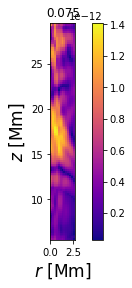

In [122]:
plt.imshow(d2,cmap='plasma', extent=rango,origin='lower')
plt.title(str(f2))
plt.ylabel(r'${z}$ [Mm]',fontsize=17)  
plt.xlabel(r'${r}$ [Mm]',fontsize=17)
plt.colorbar()
plt.show()



#plt.savefig(pathr+'_mapa_fourier_'+str(f)+'.pdf', bbox_inches='tight')   
plt.show()

/home/hcapettini/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.


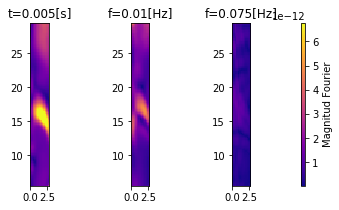

In [123]:
fig, (ax1, ax2, cax) = plt.subplots(ncols=3,figsize=(5.5,3), 
                  gridspec_kw={"width_ratios":[1,1, 0.05]})
fig.subplots_adjust(wspace=0.3)
im1  = ax1.imshow(d1, cmap='plasma', extent=rango,origin='lower', vmin=colorbarmin,vmax=colorbarmax)
ax1.title.set_text('f='+str(f1)+ '[Hz]')

im2 = ax2.imshow(d2, cmap='plasma', extent=rango,origin='lower', vmin=colorbarmin,vmax=colorbarmax)
ax2.title.set_text('f='+str(f2)+ '[Hz]')

cbar=fig.colorbar(im1, cax=cax, label='Magnitud Fourier')


cbar.set_clim(0, 0.5)
fig.savefig(path + simulacion +'/'+simulacion+'_'+'f1_f2.pdf', bbox_inches='tight')
plt.show()